In [1]:
#!pip install statsmodels
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import load_flights, load_plane_data, load_airports_details
from utils.data_preparation import prepare_data

pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid")

prepare_data()

warnings.simplefilter(action="ignore")

In [2]:
flights = load_flights(["2006", "2007", "2008"])
planes = load_plane_data()
airports = load_airports_details()
flights.memory_usage(deep=True).sum() / 1024 ** 3

1.503223163075745

In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16984354 entries, 0 to 16984353
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DayOfWeek          uint8         
 1   UniqueCarrier      category      
 2   FlightNum          uint16        
 3   TailNum            category      
 4   ActualElapsedTime  float32       
 5   CRSElapsedTime     float32       
 6   AirTime            float32       
 7   ArrDelay           float32       
 8   DepDelay           float32       
 9   Origin             category      
 10  Dest               category      
 11  Distance           uint16        
 12  TaxiIn             float32       
 13  TaxiOut            float32       
 14  Cancelled          uint8         
 15  CancellationCode   category      
 16  Diverted           uint8         
 17  CarrierDelay       float32       
 18  WeatherDelay       float32       
 19  NASDelay           float32       
 20  SecurityDelay      flo

In [4]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tailnum        5029 non-null   object  
 1   type           4480 non-null   category
 2   manufacturer   4480 non-null   category
 3   issue_date     4479 non-null   category
 4   model          4480 non-null   category
 5   status         4480 non-null   category
 6   aircraft_type  4480 non-null   category
 7   engine_type    4477 non-null   category
 8   year           4335 non-null   float32 
dtypes: category(7), float32(1), object(1)
memory usage: 123.8+ KB


In [5]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airportID  7698 non-null   int64  
 1   name       7698 non-null   object 
 2   city       7649 non-null   object 
 3   country    7698 non-null   object 
 4   iata       7698 non-null   object 
 5   icao       7698 non-null   object 
 6   lat        7698 non-null   float64
 7   lon        7698 non-null   float64
 8   altitude   7698 non-null   int64  
 9   timezone   7698 non-null   object 
 10  dst        7698 non-null   object 
 11  tz         7698 non-null   object 
 12  type       7698 non-null   object 
 13  source     7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


In [6]:
airports.head()

,airportID,name,city,country,iata,icao,lat,lon,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [7]:
#Make tailnum column in planes categorical
planes["tailnum"] = planes["tailnum"].astype("category")
planes = planes.rename(columns={"tailnum": "TailNum"})
planes.head()

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

#Merge flights with planes on tailnum
flights = flights.merge(planes, on="TailNum", how="left")
flights["DelayedDeparture"] = flights["DepDelay"] > 0
flights["DelayedArrival"] = flights["ArrDelay"] > 0
flights["Delayed"] = flights["DelayedDeparture"] | flights["DelayedArrival"]
flights.head()

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,CRSDeparture,Arrival,CRSArrival,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,DelayedDeparture,DelayedArrival,Delayed
0,3,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 07:43:00,2006-01-11 07:45:00,2006-01-11 10:24:00,2006-01-11 10:18:00,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999.0,False,True,True
1,3,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 10:53:00,2006-01-11 10:53:00,2006-01-11 13:13:00,2006-01-11 13:18:00,Corporation,AIRBUS,10/04/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Fan,NaN,False,False,False
2,3,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 19:15:00,2006-01-11 19:15:00,2006-01-11 21:10:00,2006-01-11 21:33:00,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997.0,False,False,False
3,3,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 17:53:00,2006-01-11 17:55:00,2006-01-11 19:25:00,2006-01-11 19:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,3,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 08:24:00,2006-01-11 08:32:00,2006-01-11 10:15:00,2006-01-11 10:15:00,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990.0,False,False,False


In [9]:
flights.columns

Index(['DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Departure', 'CRSDeparture', 'Arrival', 'CRSArrival', 'type',
       'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type',
       'engine_type', 'year', 'DelayedDeparture', 'DelayedArrival', 'Delayed'],
      dtype='object')

In [10]:
flights = flights.rename(columns={"year" : "plane_year"})
flights.columns

Index(['DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Departure', 'CRSDeparture', 'Arrival', 'CRSArrival', 'type',
       'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type',
       'engine_type', 'plane_year', 'DelayedDeparture', 'DelayedArrival',
       'Delayed'],
      dtype='object')

In [11]:
#What plane model most delays are associated with?
delay_by_plane = pd.DataFrame(flights.groupby(["manufacturer", "model"])["Delayed"].mean() * 100)
delay_by_plane.sort_values(by="Delayed", ascending=False).head(10)

Delayed
manufacturer     model               
BOEING           777-224    89.156627
AIRBUS INDUSTRIE A330-323   84.304047
BOEING           777-232    83.317025
                 747-422    81.114130
                 767-2B7    78.749389
                 747-451    78.378378
                 767-201    76.351720
                 767-224    75.490412
AIRBUS           A321-211   73.475000
BOEING           737-924ER  73.287144

In [12]:
#What is the relationship between age of the plane and delay?
flights["Year"] = flights["Departure"].dt.year
flights["PlaneAge"] = flights["Year"] - flights["plane_year"]
flights = flights[(flights["PlaneAge"] < 100) & (flights["PlaneAge"] > 0)]
flights["PlaneAge"].describe()


count    1.356549e+07
mean     9.918264e+00
std      7.186502e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      5.200000e+01
Name: PlaneAge, dtype: float64

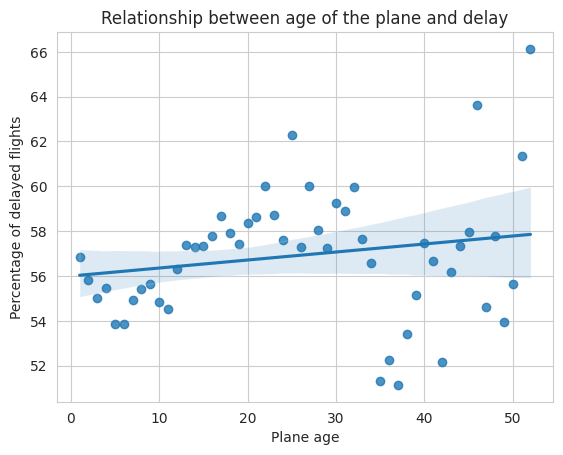

In [13]:
delay_by_age = pd.DataFrame(flights.groupby("PlaneAge")["Delayed"].mean() * 100)

sns.regplot(x=delay_by_age.index, y=delay_by_age["Delayed"], data=delay_by_age, fit_reg=True)
plt.title("Relationship between age of the plane and delay")
plt.xlabel("Plane age")
plt.ylabel("Percentage of delayed flights")
plt.show()

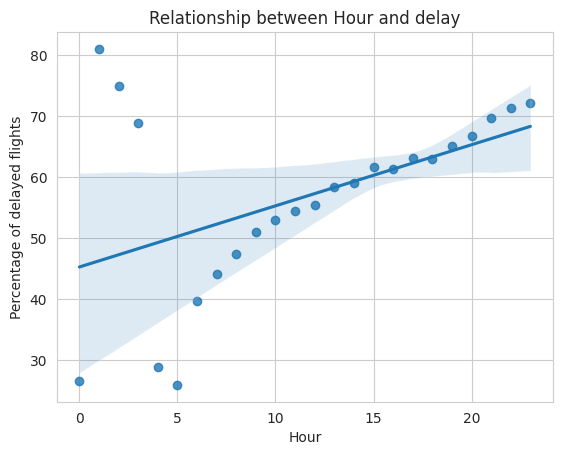

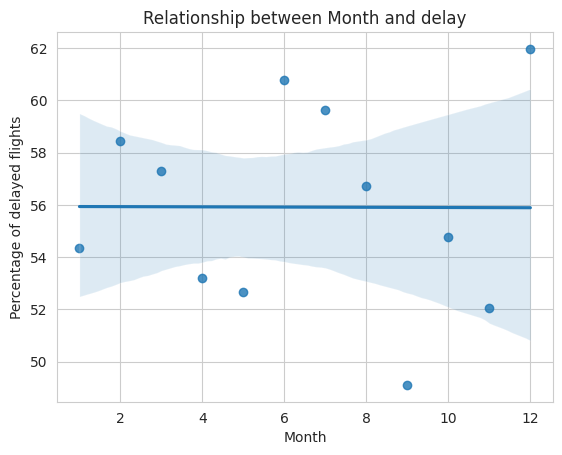

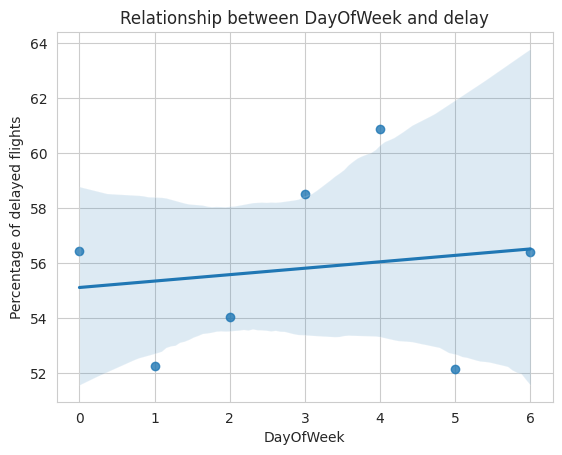

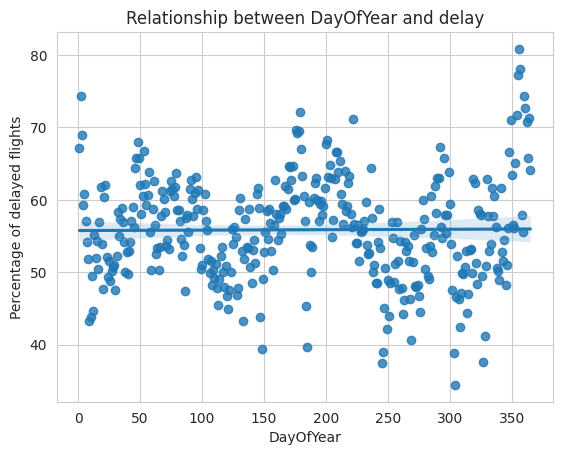

In [14]:
#What are the best and worst times to fly to minimize delays?
times = ["Hour", "Month", "DayOfWeek", "DayOfYear"]

flights["Hour"] = flights["Departure"].dt.hour
flights["Month"] = flights["Departure"].dt.month
flights["DayOfWeek"] = flights["Departure"].dt.dayofweek
flights["DayOfYear"] = flights["Departure"].dt.dayofyear

for time in times:
    delay_by_time = pd.DataFrame(flights.groupby(time)["Delayed"].mean() * 100)
    sns.regplot(x=delay_by_time.index, y=delay_by_time["Delayed"], data=delay_by_time, fit_reg=True)
    plt.title(f"Relationship between {time} and delay")
    plt.xlabel(time)
    plt.ylabel("Percentage of delayed flights")
    plt.show()

In [15]:
#Create column showing the main delay reason, it compares columns: CarrierDelay, 
#WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay and chooses the one with the highest value
flights["DelayReason"] = flights[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]].idxmax(axis=1)
flights["DelayReason"].str.replace("Delay", "").value_counts()

DelayReason
Carrier         9646326
LateAircraft    1158285
NAS             1059502
Weather          128977
Security           9242
Name: count, dtype: int64

In [16]:
flights.columns

Index(['DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Departure', 'CRSDeparture', 'Arrival', 'CRSArrival', 'type',
       'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type',
       'engine_type', 'plane_year', 'DelayedDeparture', 'DelayedArrival',
       'Delayed', 'Year', 'PlaneAge', 'Hour', 'Month', 'DayOfYear',
       'DelayReason'],
      dtype='object')

In [17]:
#Calculate average delay time for each reason
reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

for reason in reasons:
    mean_delay = flights[reason].mean()
    print(f"Average delay time for {reason} is {mean_delay:.2f} minutes")

Average delay time for CarrierDelay is 4.22 minutes
Average delay time for WeatherDelay is 0.83 minutes
Average delay time for NASDelay is 4.41 minutes
Average delay time for SecurityDelay is 0.03 minutes
Average delay time for LateAircraftDelay is 5.59 minutes


In [18]:
airports.columns

Index(['airportID', 'name', 'city', 'country', 'iata', 'icao', 'lat', 'lon',
       'altitude', 'timezone', 'dst', 'tz', 'type', 'source'],
      dtype='object')

In [19]:
#Get the state in which the airport is located
airports["Location"] = airports["tz"].str.split("/").str[1]
flights = flights.merge(airports[["iata", "Location"]], left_on="Origin", right_on="iata", how="left")
flights = flights.rename(columns={"state": "OriginLoc"})
flights = flights.drop(columns="iata")
flights = flights.merge(airports[["iata", "Location"]], left_on="Dest", right_on="iata", how="left")
flights = flights.rename(columns={"state": "DestLoc"})
flights = flights.drop(columns="iata")
flights.head()

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,CRSDeparture,Arrival,CRSArrival,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,plane_year,DelayedDeparture,DelayedArrival,Delayed,Year,PlaneAge,Hour,Month,DayOfYear,DelayReason,Location_x,Location_y
0,2,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 07:43:00,2006-01-11 07:45:00,2006-01-11 10:24:00,2006-01-11 10:18:00,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999.0,False,True,True,2006,7.0,7,1,11,CarrierDelay,New_York,Phoenix
1,2,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 19:15:00,2006-01-11 19:15:00,2006-01-11 21:10:00,2006-01-11 21:33:00,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997.0,False,False,False,2006,9.0,19,1,11,CarrierDelay,New_York,Phoenix
2,2,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 08:24:00,2006-01-11 08:32:00,2006-01-11 10:15:00,2006-01-11 10:15:00,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990.0,False,False,False,2006,16.0,8,1,11,CarrierDelay,Chicago,Phoenix
3,2,US,295,N733UW,127.0,122.0,108.0,2.0,-3.0,BDL,CLT,644,6.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 06:27:00,2006-01-11 06:30:00,2006-01-11 08:34:00,2006-01-11 08:32:00,Corporation,AIRBUS INDUSTRIE,04/11/2000,A319-112,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,False,True,True,2006,6.0,6,1,11,CarrierDelay,New_York,New_York
4,2,US,356,N404US,133.0,123.0,121.0,7.0,-3.0,BDL,CLT,644,4.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2006-01-11 09:42:00,2006-01-11 09:45:00,2006-01-11 11:55:00,2006-01-11 11:48:00,Corporation,BOEING,04/12/2005,737-401,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1989.0,False,True,True,2006,17.0,9,1,11,CarrierDelay,New_York,New_York


In [26]:
flights = flights.rename(columns={"Location_x": "OriginLoc", "Location_y": "DestLoc"})

In [28]:
#Which locations are associated with the most often delays?
delay_by_location = pd.DataFrame(flights.groupby("OriginLoc")["Delayed"].mean() * 100)
delay_by_location.sort_values(by="Delayed", ascending=False).head(10)

,Delayed
OriginLoc,
Phoenix,57.218871
St_Thomas,56.956933
Chicago,56.861763
New_York,56.852268
Los_Angeles,55.604763
Denver,53.810278
Puerto_Rico,51.243662
Anchorage,50.401391
Adak,42.477876


In [29]:
#Which locations are associated with the most often delays?
delay_by_location = pd.DataFrame(flights.groupby("DestLoc")["Delayed"].mean() * 100)
delay_by_location.sort_values(by="Delayed", ascending=False).head(10)

,Delayed
DestLoc,
Adak,68.141593
Puerto_Rico,61.713048
St_Thomas,61.416589
Los_Angeles,58.323521
Anchorage,56.465176
New_York,56.444773
Chicago,55.953828
Phoenix,55.100484
Denver,52.924714


In [30]:
#Which departure locations are associated with the biggest average departure delay time?
delay_by_location = pd.DataFrame(flights.groupby("OriginLoc")["DepDelay"].mean())
delay_by_location.sort_values(by="DepDelay", ascending=False).head(10)

,DepDelay
OriginLoc,
Chicago,12.381458
New_York,12.005730
St_Thomas,9.895971
Phoenix,9.351537
Anchorage,9.069686
Los_Angeles,8.760744
Denver,8.190011
Puerto_Rico,7.796348
Adak,1.924528


In [31]:
#Which destination locations are associated with the biggest average arrival delay time?
delay_by_location = pd.DataFrame(flights.groupby("DestLoc")["ArrDelay"].mean())
delay_by_location.sort_values(by="ArrDelay", ascending=False).head(10)

,ArrDelay
DestLoc,
New_York,11.029252
Chicago,10.965604
Puerto_Rico,10.622474
Anchorage,9.644136
Adak,8.783019
St_Thomas,8.737162
Los_Angeles,8.273554
Denver,6.759198
Phoenix,5.656394


In [34]:
#Which locations are associated with the biggest mean of average departure and arrival delay times?
delay_by_location = pd.DataFrame(flights.groupby("OriginLoc")[["DepDelay", "ArrDelay"]].mean())
delay_by_location["MeanDelay"] = (delay_by_location["DepDelay"] + delay_by_location["ArrDelay"]) / 2
delay_by_location = delay_by_location.rename_axis("Location")
delay_by_location.sort_values(by="MeanDelay", ascending=False).head(10)

,DepDelay,ArrDelay,MeanDelay
Location,,,
Chicago,12.381458,11.429193,11.905325
New_York,12.005730,11.042230,11.523979
St_Thomas,9.895971,9.666268,9.781120
Anchorage,9.069686,7.525334,8.297510
Los_Angeles,8.760744,7.080968,7.920856
Denver,8.190011,7.641464,7.915738
Phoenix,9.351537,6.474339,7.912938
Puerto_Rico,7.796348,6.594069,7.195209
Honolulu,-0.016226,0.211398,0.097586
